#### Submitted by
Name: Arunima Dahiya
Roll No.: 17CSU036

### Project Title
## Titanic Survival Prediction

The Titanic survival dataset is a dataset collected after the crash of the ill-fated RMS Titanic which was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. 
The dataset contains information regarding the passengers of the ship and whether they survived.

## Data

In [104]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()
# from sklearn.linear_model import LinearRegression

# regressor = LinearRegression()
# regressor.fit(X_train, Y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)



In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization

C:\Users\radicalroar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


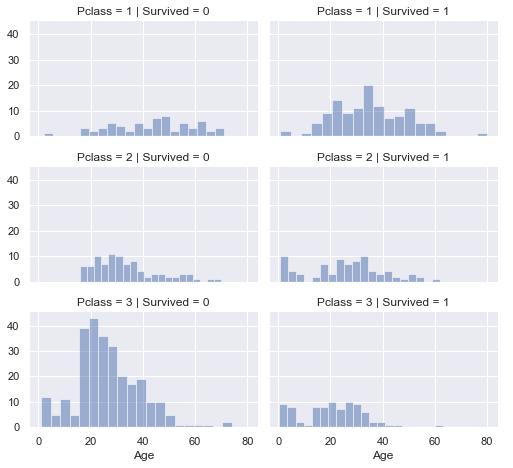

In [100]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### Age and Sex:

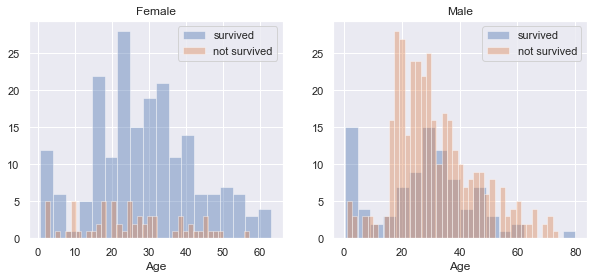

In [101]:
#Age and Sex:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


#### Embarked, Pclass and Sex:

C:\Users\radicalroar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


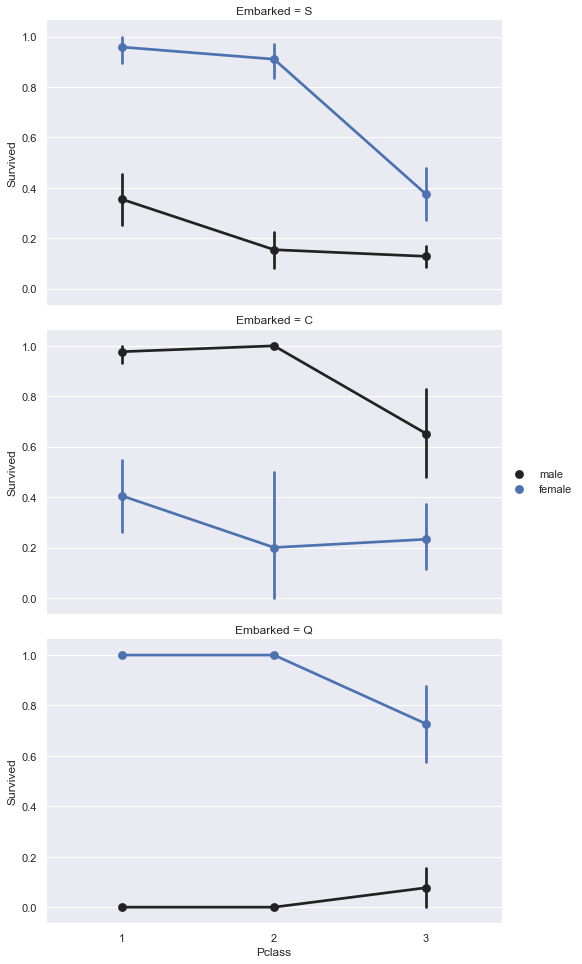

In [102]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

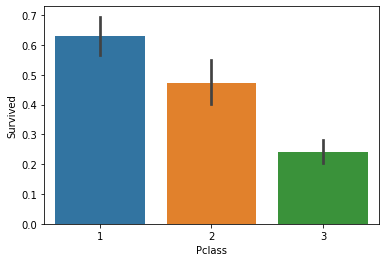

In [96]:
#Clear relation between Pclass of passenger & their survival
sns.barplot(x='Pclass', y='Survived', data=train_df)

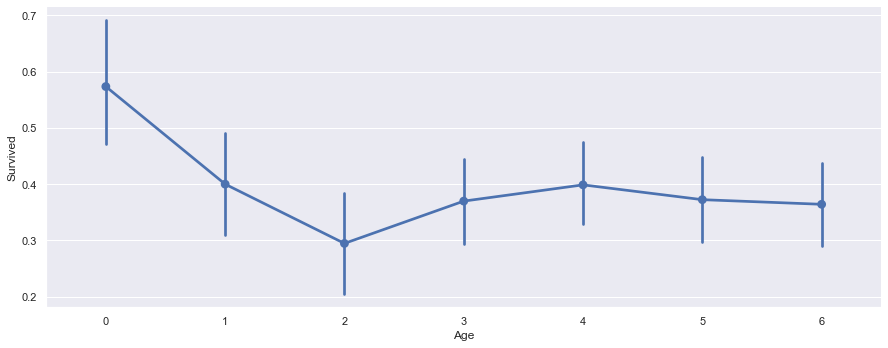

In [138]:
axes = sns.factorplot('Age','Survived', 
                      data=train_df, aspect = 2.5, )

# Data Preprocessing

In [112]:
#handling missing values in cabin, embarked & age

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset['Age'].fillna(dataset['Age'].mean())
    dataset["Age"] = dataset["Age"].astype(int)
train_df["Age"].isnull().sum()

data = [train_df, test_df]
common_value = 'S'
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#converting gender & embarked to numerical values
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#making categories for age & fare
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# train_df = train_df.drop(['SibSp'], axis=1)
# test_df = test_df.drop(['SibSp'], axis=1)
# train_df = train_df.drop(['Parch'], axis=1)
# test_df = test_df.drop(['Parch'], axis=1)
# train_df = train_df.drop(['Embarked'], axis=1)
# test_df = test_df.drop(['Embarked'], axis=1)
# train_df = train_df.drop(['Fare'], axis=1)
# test_df = test_df.drop(['Fare'], axis=1)
# train_df = train_df.drop(['Deck'], axis=1)
# test_df = test_df.drop(['Deck'], axis=1)
# train_df = train_df.drop(['Pclass'], axis=1)
# test_df = test_df.drop(['Pclass'], axis=1)

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,2,1,0,0,0,8
1,2,1,1,1,5,1,0,3,1,3
2,3,1,3,1,3,0,0,0,0,8
3,4,1,1,1,5,1,0,3,0,3
4,5,0,3,0,5,0,0,1,0,8
5,6,0,3,0,1,0,0,1,2,8
6,7,0,1,0,6,0,0,3,0,5
7,8,0,3,0,0,3,1,2,0,8
8,9,1,3,1,3,0,2,1,0,8
9,10,1,2,1,1,1,0,2,1,8


KDE Plot

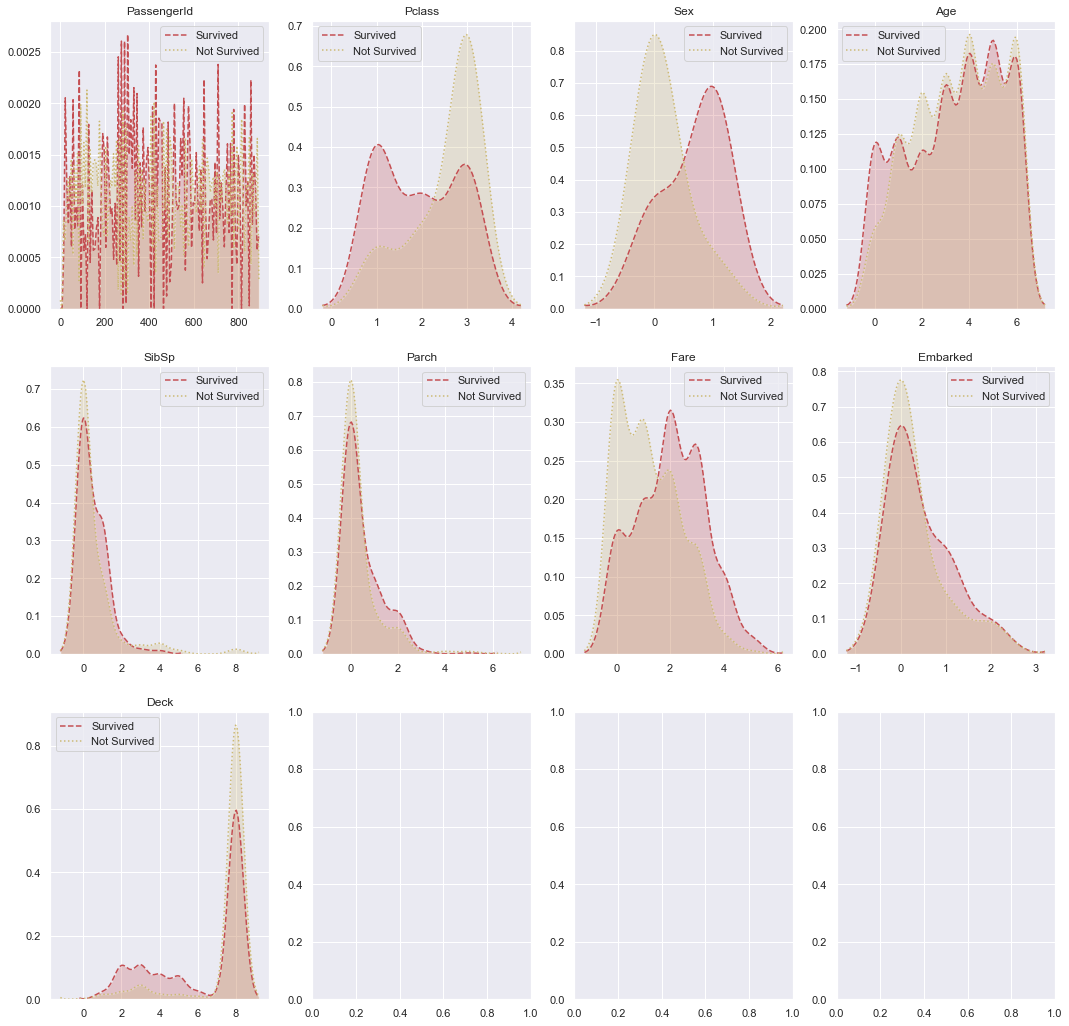

In [97]:
i = 1
# train_df.drop('Name', axis=1)
fig, ax = plt.subplots(3,4,figsize=(18,18))
for column_header in train_df.columns: 
    if column_header not in ['Name', 'Survived', 'Ticket', 'Cabin']:
        plt.subplot(3,4,i)
        sns.kdeplot(train_df[train_df['Survived']==1][column_header], bw = 0.4, label = "Survived", shade=True, color="r", linestyle="--")
        sns.kdeplot(train_df[train_df['Survived']==0][column_header], bw = 0.4, label = "Not Survived", shade=True, color= "y", linestyle=":")
        plt.title(column_header, fontsize=12)
        i = i + 1
plt.show()

# Regression Analysis

## Single variable Linear Regression

Coefficients: 
 [[-0.19372993]]
Intercept: 
 [0.83835789]
Mean squared error: 0.19979532056013652
Variance score: 0.12402273315991585


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.54e-25
Time:                        15:56:30   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8386      0.045     18.597      0.000       0.750       0.927
Pclass        -0.1970      0.018    -10.725      0.000      -0.233      -0.161
==============================================================================
Omnibus:                     1338.045   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.541
Skew:                           0.428   Prob(JB):                     9.79e-20
Kurtosis:                       1.725   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

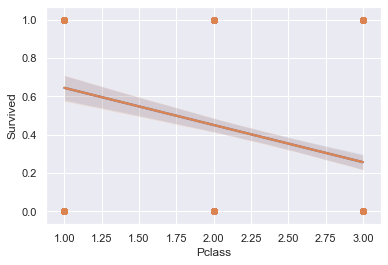

In [62]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('titanic_subset.csv')
dataset=train_df[['Pclass','Survived']]
dataset=dataset.dropna()

# dataset.loc[dataset["Pclass"] == "male", "Pclass"] = 0
# dataset.loc[dataset["Pclass"] == "female", "Pclass"] = 1
# print(dataset)
X = dataset.iloc[:, :-1]
y = pd.DataFrame(dataset.iloc[:, -1]) #convert to dataframe if it gets returned as a series

#converting 'Pclass' to 'female':0,'male':1
# for change in dataset:
#     change['Pclass']=change['Pclass'].map({'female':0,'male':1}).astype(int)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


# Visualising the Training set results
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
# dataframe_training["Pclass"].fillna("0", inplace = True)
# dataframe_training.head(40)
dataframe_training['Pclass'] = X_train['Pclass']
dataframe_training['Survived'] = y_train
ax = sns.regplot(x="Pclass", y="Survived", data= dataframe_training)

# Visualising the Test set results
dataframe_test = pd.DataFrame()
# dataframe_training["Pclass"].fillna("0", inplace = True)
dataframe_test['Pclass'] = X_test['Pclass']
dataframe_test['Survived'] = y_test
ax = sns.regplot(x="Pclass", y="Survived", data= dataframe_training)

# The coefficients
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))


import statsmodels.api as sm

# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(X)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(endog = y, exog=x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

## multiple linear regression

In [66]:
dataset=train_df[['Pclass','Survived']]
dataset=dataset.dropna()

X = train_df.iloc[:, :-1]
y = pd.DataFrame(train_df.iloc[:, -1]) #convert to dataframe if it gets returned as a series



# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


# Visualising the Training set results
# import seaborn as sns
# sns.set(color_codes=True)

# dataframe_training = pd.DataFrame()
# # dataframe_training["Pclass"].fillna("0", inplace = True)
# # dataframe_training.head(40)
# dataframe_training['Pclass'] = X_train['Pclass']
# dataframe_training['Survived'] = y_train
# ax = sns.regplot(x="Pclass", y="Survived", data= dataframe_training)

# # Visualising the Test set results
# dataframe_test = pd.DataFrame()
# # dataframe_training["Pclass"].fillna("0", inplace = True)
# dataframe_test['Pclass'] = X_test['Pclass']
# dataframe_test['Survived'] = y_test
# ax = sns.regplot(x="Pclass", y="Survived", data= dataframe_training)

# The coefficients
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))


import statsmodels.api as sm

# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(X)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(endog = y, exog=x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

Coefficients: 
 [-0.11242383  0.50072987 -0.03859076 -0.04768933 -0.04005665  0.04195453
  0.0354627  -0.01710041]
Intercept: 
 0.6828899144572074
Mean squared error: 0.14573602789970772
Variance score: 0.38135558161969607


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     72.42
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.81e-91
Time:                        15:56:50   Log-Likelihood:                -397.02
No. Observations:                 891   AIC:                             812.0
Df Residuals:                     882   BIC:                             855.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6639      0.093      7.176      0.000       0.482       0.845
Pclass        -0.1227      0.030     -4.149      0.000      -0.181      -0.065
Sex            0.5017      0.028     17.701      0.000       0.446       0.557
Age           -0.0355      0.007     -4.843      0.000      -0.050      -0.021
SibSp         -0.0470      0.014     -3.326      0.001      -0.075      -0.019
Parch         -0.0262      0.019     -1.362      0.174      -0.064       0.012
Fare           0.0338      0.018      1.860      0.063      -0.002       0.070
Embarked       0.0384      0.020      1.878      0.061      -0.002       0.079
Deck          -0.0117      0.009     -1.253      0.210      -0.030       0.007
==============================================================================
Omnibus:                       36.166   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.673
Skew:                           0.514   Prob(JB):                     2.43e-09
Kurtosis:                       3.106   Cond. No.                         64.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions of linear regression

In [11]:
residual = y_test-y_pred

multicolinearity

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
vif,22.27263,1.782764,4.147326,1.728279,1.725269,3.610238,1.38714,24.166009


normality of residuals

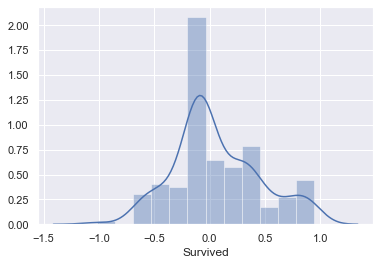

In [115]:
sns.distplot(residual)

homoscedasticity

In [135]:
r_lin=0.2954567
r_mul=0.42823874

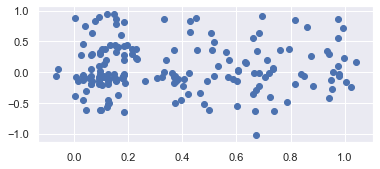

In [117]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

autocorrelation

C:\Users\radicalroar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


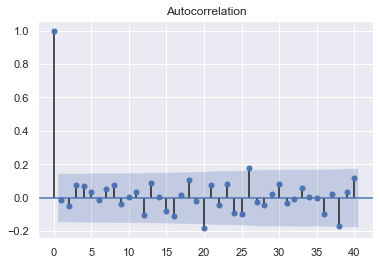

In [119]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Logistic Regression

In [113]:
dataset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')
label=dataset.iloc[0:890,1]
data=dataset.iloc[0:890,[2,4,5]]
testdat=testset.iloc[0:418,[1,3,4]]
x=[data,testdat]

for change in x:
    change['Sex']=change['Sex'].map({'female':0,'male':1}).astype(int)
    

data=(data.fillna(0)) #filling NA values
testdat=testdat.fillna(0)
# print(testdat)

from sklearn.model_selection import train_test_split

train_data,test_data,train_labels,test_labels=train_test_split(data,label,random_state=7,train_size=0.7)

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(data,label)

predictions=clf.predict(test_data)

from sklearn.metrics import accuracy_score
acc_log = accuracy_score(test_labels,predictions)
print('Accuracy Score:', acc_log)


# print('result:')
result=clf.predict(testdat)
# print(result)

for x in np.nditer(result,op_flags=['readwrite']):
    if x<0.5:
        x[...]=0
    else:
        x[...]=1
  
# result=np.array(result,dtype='int')
# print(result)

# index=[testset['PassengerId']]
# df=pd.DataFrame(data=result,index=testset['PassengerId'],columns=['Survived'])
# df.to_csv('gender_submission.csv',header=True)
# print(df)
# print('gender_submission2.csv')



Accuracy Score: 0.7415730337078652


#### Comparison

In [136]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Logistic Regression'],
    'Score': [r_lin*100, r_mul*100,acc_log*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
74.157303,Logistic Regression
42.823874,Multiple Linear Regression
29.545670,Linear Regression


Clearly since this is a classification problem, Logistic Regression works best with the dataset.

# Classification Techniques

## Splitting dataset

In [114]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [115]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Importing performance measures

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

### KNN


Accuracy score of KNN:  85.39
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       121
           1       0.75      0.78      0.76        58

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.85      0.84      0.84       179



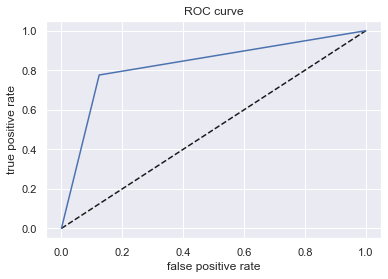

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
# print(Y_pred)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print('\nAccuracy score of KNN: ', acc_knn)

print('Classification report:\n', classification_report(y_test,y_pred))
from sklearn.metrics import roc_curve
# y_pred_proba = svc_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

### Gaussian Naive Bayes


Accuracy score of naive bayes:  76.83
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       121
           1       0.66      0.88      0.76        58

    accuracy                           0.82       179
   macro avg       0.80      0.83      0.80       179
weighted avg       0.84      0.82      0.82       179



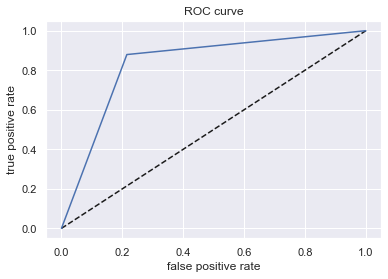

In [118]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)  
# print(y_pred)
acc_gnb = round(gaussian.score(X_train, y_train) * 100, 2)
print('\nAccuracy score of naive bayes: ', acc_gnb)

print('Classification report:\n', classification_report(y_test,y_pred))
from sklearn.metrics import roc_curve
# y_pred_proba = svc_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

## SVM

Accuracy score of SVM:  79.78
Confusion matrix SVM:
 [[105  16]
 [ 10  48]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       121
           1       0.75      0.83      0.79        58

    accuracy                           0.85       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179



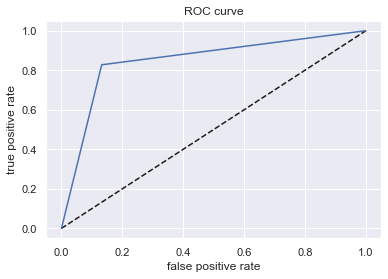

In [124]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)

# Y_pred = linear_svc.predict(X_test)

# acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)
acc_svm = round(svc_model.score(X_train, y_train) * 100, 2)
print('Accuracy score of SVM: ', acc_svm)
print('Confusion matrix SVM:\n', confusion_matrix(y_test,predictions))
print('Classification report:\n', classification_report(y_test,predictions))
from sklearn.metrics import roc_curve
# y_pred_proba = svc_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='svm')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()


### Randomized search

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
from sklearn.model_selection import RandomizedSearchCV
rnd = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=2)
rnd.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=0.001, C=100 ..............................................
[CV] ............................... gamma=0.001, C=100, total=   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ................................... gamma=1, C=0.1, total=   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ................................. gamma=0.1, C=0.1, total=   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ................................. gamma=0.1, C=0.1, total=   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ................................. gamma=0.1, C=0.1, total=   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ................................. gamma=0.1, C=0.1, total=   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ................................. gamma=0.1, C=0.1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [126]:
print('Best params: ',rnd.best_params_)
print('Best score: ', rnd.best_score_)

Best params:  {'gamma': 0.01, 'C': 100}
Best score:  0.7977839062346105


In [127]:
rnd_predictions = rnd.predict(X_test)
print('Confusion matrix randomized search : ')
confusion_matrix(y_test,rnd_predictions)

Confusion matrix randomized search : 


array([[107,  14],
       [ 10,  48]], dtype=int64)

#### Grid search

In [128]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished


In [129]:
from sklearn.metrics import accuracy_score
acc_grid = accuracy_score(y_test,grid_predictions)
print('Accuracy Score : ' , acc_grid)
print('Classificatio report grid search: ')
print(classification_report(y_test,grid_predictions))

Accuracy Score :  0.8603351955307262
Classificatio report grid search: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.76      0.83      0.79        58

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.86      0.86       179



## Random Forest Model

Accuracy score of Random Forest:  91.71
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       121
           1       0.75      0.84      0.80        58

    accuracy                           0.86       179
   macro avg       0.84      0.86      0.85       179
weighted avg       0.87      0.86      0.86       179



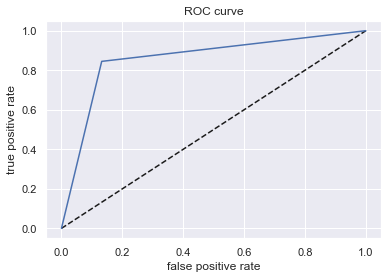

In [120]:
from sklearn.ensemble import RandomForestClassifier

# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print('Accuracy score of Random Forest: ', acc_random_forest)
print('Classification report:\n', classification_report(y_test,Y_prediction))
# from sklearn.metrics import roc_curve
# y_pred_proba = svc_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, Y_prediction)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

## Conclusion

In [132]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Grid search', 'KNN', 'Random Forest', 'Naive Bayes', 'Logistic Regression'],
    'Score': [acc_svm, acc_grid*100, acc_knn, acc_random_forest, acc_gnb, acc_log*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.710000,Random Forest
86.033520,Grid search
85.390000,KNN
79.780000,Support Vector Machines
76.830000,Naive Bayes
74.157303,Logistic Regression


#### Clearly, till now Random Forest Classification Model is the best model for accurately predicting the survival of Titanic passegers.